In [6]:
import pandas as pd #导入pandas包
import numpy as np #导入numpy包
from sklearn.model_selection import train_test_split #导入此包用来进行分割训练集和测试集
from sklearn.metrics import mean_squared_error # 导入此包用来进行计算均方根误差
from sklearn.svm import SVR # 导入支持向量机回归包函数
from sklearn.preprocessing import StandardScaler #导入此包数据特征的处理
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn import svm
import warnings
from sklearn.metrics import r2_score,mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [7]:
#导入数据
data = pd.read_excel(r"F:\OneDrive - csu.edu.cn\1-科技论文\3-机器学习预测算法\空气补气速度.xlsx")
# 分离特征值和结果值
data_x = data.iloc[:,0:4]
data_y = data.iloc[:,4:5]

In [8]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=42)

In [9]:
# 特征缩放
scaler = StandardScaler() #创建一个scaler的示例函数
X_train = scaler.fit_transform(X_train) #将训练特征转化为零均值、单位方差
X_test = scaler.transform(X_test)#将测试特征转化为零均值、单位方差

In [10]:
warnings.filterwarnings("ignore")
param_grid = {
    'n_estimators': [10,100,200,300],
    'max_depth': [None, 10, 20,30],
    'min_samples_split': [2,10,15,20,],
    'min_samples_leaf': [1, 2, 4,8],
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("最佳参数: ", grid_search.best_params_)
print("最佳分数（负均方误差）: ", grid_search.best_score_)

best_params = grid_search.best_params_
model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], min_samples_leaf=best_params['min_samples_leaf'])
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print("均方根误差（MSE）: ", mse)
r2_test = r2_score(y_test, y_test_pred)
print("测试集R平方值: ", r2_test)
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("训练集R平方值: ", r2_train)
# 对测试集进行MAE计算
mae_test = mean_absolute_error(y_test, y_test_pred)
print("测试集MAE: ", mae_test)
# 对训练集进行MAE计算
mae_train = mean_absolute_error(y_train, y_train_pred)
print("训练集MAE: ", mae_train)

最佳参数:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
最佳分数（负均方误差）:  -0.035960998977171935
均方根误差（MSE）:  0.04081757630028481
测试集R平方值:  0.9443220863592736
训练集R平方值:  0.9929888060750993
测试集MAE:  0.15913982576343064
训练集MAE:  0.05305243935649618


In [15]:
# 最佳参数对于随机森林模型的训练
model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
mes = mean_squared_error(y_test,y_test_pred)
print("MES: ", mes)
r2_test = r2_score(y_test, y_test_pred)
print("测试集r2: ", r2_test)
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("训练集r2: ", r2_train)
# 对测试集进行MAE计算
mae_test = mean_absolute_error(y_test, y_test_pred)
print("测试集MAE: ", mae_test)
# 对训练集进行MAE计算
mae_train = mean_absolute_error(y_train, y_train_pred)
print("训练集MAE: ", mae_train)

MES:  0.039427901783925176
测试集r2:  0.9462176956708449
训练集r2:  0.9932203676148345
测试集MAE:  0.15826591662652426
训练集MAE:  0.051969919592110295


In [13]:
# train数据的保存
y_train_data = pd.DataFrame(y_train)
y_train_data = y_train.reset_index()
y_train_pred_data = pd.DataFrame(y_train_pred)
y_train_pred_data = y_train_pred_data.reset_index()
train_data = pd.concat([y_train_data,y_train_pred_data],axis=1,ignore_index=True)
train_data_base = train_data[[1,3]].to_csv(r'F:\OneDrive - csu.edu.cn\1-科技论文\3-机器学习预测算法\3-不同机器学习模型下预测效果的判定\RF\RF_train.csv')

In [14]:
# train数据的保存
y_test_data = pd.DataFrame(y_test)
y_test_data = y_test.reset_index()
y_test_pred_data = pd.DataFrame(y_test_pred)
y_test_pred_data = y_test_pred_data.reset_index()
test_data = pd.concat([y_test_data,y_test_pred_data],axis=1,ignore_index=True)
test_data_base = test_data[[1,3]].to_csv(r'F:\OneDrive - csu.edu.cn\1-科技论文\3-机器学习预测算法\3-不同机器学习模型下预测效果的判定\RF\RF_test.csv')

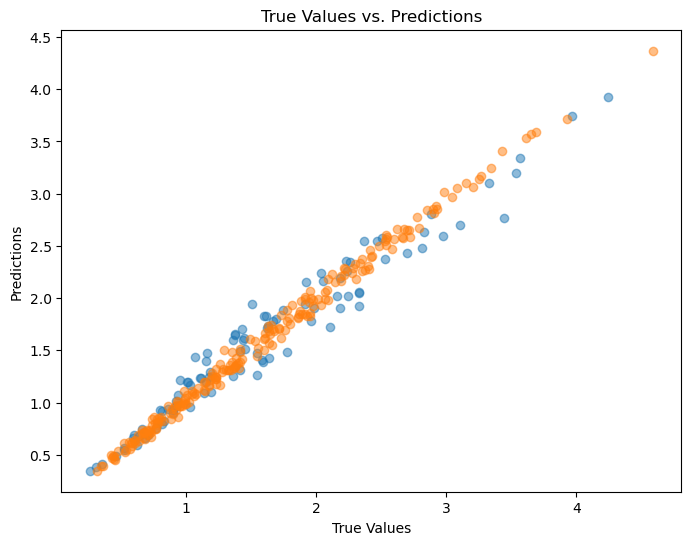

In [12]:
# 对数据进行相应的可视化操作
plt.figure(figsize=(8, 6))  # 设置图形大小
# 绘制散点图
plt.scatter(y_test, y_test_pred, alpha=0.5)  # 绘制散点图，alpha参数控制点的透明度
plt.scatter(y_train, y_train_pred, alpha=0.5)  # 绘制散点图，alpha参数控制点的透明度
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')

# 绘制一条对角线，表示理想情况下预测值等于真实值
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# 显示图形
plt.show()